## Support Vector Classifier Implementation

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Create synthetic data points
from sklearn.datasets import make_classification

In [17]:
X,y = make_classification(n_samples=1000, n_features=2,
                          n_classes=2, n_clusters_per_class=2,
                          n_redundant=0)

In [18]:
X

array([[ 1.38420702,  0.81367063],
       [-1.22439453, -1.08313957],
       [ 1.15749322,  1.08724759],
       ...,
       [-0.53195283,  1.24806123],
       [ 1.1733615 ,  1.25173749],
       [-1.4210873 ,  0.76167384]])

In [19]:
y

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,

<Axes: xlabel='0', ylabel='1'>

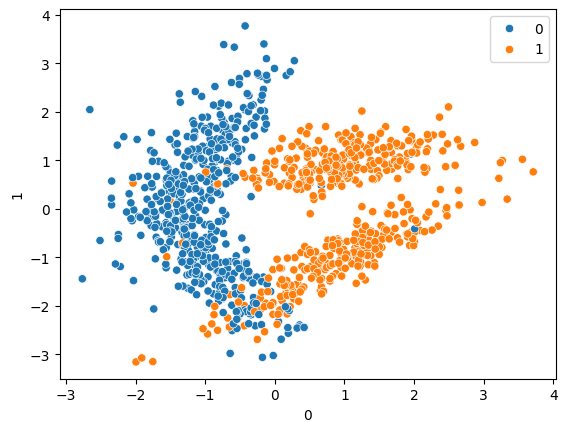

In [20]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [21]:
from sklearn.svm import SVC

In [22]:
svc = SVC(kernel='linear')

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [24]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [25]:
# Prediction
y_pred = svc.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       129
           1       0.95      0.91      0.93       121

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

[[123   6]
 [ 11 110]]


In [27]:
# RBF kernel
rbf = SVC(kernel='rbf')
rbf.fit(X_train, y_train)
y_pred_1 = rbf.predict(X_test)
print(classification_report(y_test, y_pred_1))
print(confusion_matrix(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       129
           1       0.97      0.92      0.94       121

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

[[126   3]
 [ 10 111]]


In [28]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Defining parameter range
param_grid = {'C':[0.1,1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel':['rbf']}

In [30]:
grid = GridSearchCV(SVC(), param_grid=param_grid, refit=True, cv=5, verbose=3, n_jobs=-1)

In [31]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.940 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.907 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.887 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.507 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.507 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.507 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.507 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.513 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [32]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [33]:
# prediction
y_pred_2 = grid.predict(X_test)
print(classification_report(y_test, y_pred_2))
print(confusion_matrix(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       129
           1       0.97      0.93      0.95       121

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

[[126   3]
 [  8 113]]
